In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data,_ = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)

In [3]:
data.shape

(1000, 2)

Text(0, 0.5, 'Y')

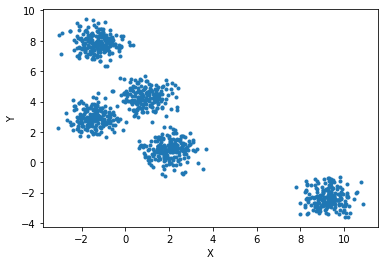

In [4]:
plt.plot(data[:,0],data[:,1],'.')
plt.xlabel('X')
plt.ylabel('Y')

In [5]:
kmeans = KMeans(n_clusters=5)

In [6]:
%%time
kmeans.fit(data)

CPU times: user 33.5 ms, sys: 29 µs, total: 33.5 ms
Wall time: 37.2 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 9.25676035 -2.33887834]
 [ 0.91291817  4.29862073]
 [-1.28588328  7.87003554]
 [ 1.9970182   0.8253682 ]
 [-1.4494779   2.91731438]]


In [8]:
kmeans.labels_

array([2, 4, 3, 3, 1, 1, 0, 1, 1, 3, 0, 2, 3, 1, 1, 1, 0, 3, 1, 4, 0, 0,
       4, 3, 4, 2, 4, 2, 0, 0, 1, 0, 0, 3, 0, 0, 3, 2, 0, 0, 3, 4, 2, 3,
       1, 4, 1, 4, 1, 2, 3, 1, 2, 1, 1, 0, 1, 0, 1, 3, 1, 0, 0, 1, 1, 2,
       2, 3, 4, 0, 4, 1, 0, 4, 3, 0, 0, 3, 3, 3, 2, 4, 0, 4, 3, 1, 2, 0,
       0, 1, 1, 4, 2, 3, 1, 1, 2, 4, 4, 4, 2, 4, 4, 0, 4, 1, 1, 0, 4, 1,
       1, 1, 4, 1, 3, 1, 0, 4, 0, 1, 1, 4, 2, 2, 4, 1, 3, 3, 2, 0, 3, 2,
       3, 0, 2, 1, 3, 1, 1, 1, 3, 0, 0, 0, 4, 3, 4, 1, 2, 2, 3, 1, 3, 0,
       3, 1, 3, 1, 3, 0, 2, 1, 4, 2, 3, 3, 1, 1, 1, 1, 4, 2, 0, 1, 3, 0,
       4, 4, 3, 0, 0, 3, 2, 2, 1, 2, 1, 3, 1, 2, 2, 2, 4, 3, 2, 0, 1, 0,
       4, 2, 4, 0, 0, 3, 0, 4, 2, 0, 1, 2, 2, 3, 0, 2, 1, 2, 1, 0, 2, 1,
       4, 4, 3, 3, 0, 3, 0, 3, 1, 3, 2, 0, 1, 1, 2, 3, 0, 0, 1, 3, 1, 1,
       4, 0, 0, 2, 3, 4, 4, 1, 4, 4, 3, 3, 0, 0, 3, 2, 1, 3, 0, 0, 1, 4,
       1, 3, 0, 1, 4, 0, 4, 1, 4, 0, 0, 4, 1, 0, 3, 0, 0, 2, 3, 3, 3, 2,
       2, 0, 1, 0, 4, 0, 1, 2, 4, 4, 2, 1, 0, 2, 0,

Text(0, 0.5, 'Y')

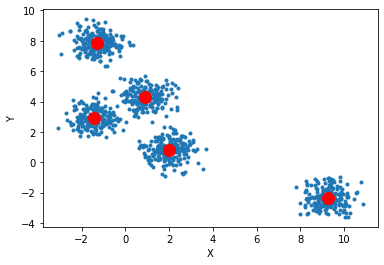

In [9]:
plt.plot(data[:,0],data[:,1],'.')
#plt.scatter(data[:,0],data[:,1],c=kmeans.labels_)
plt.plot(centroids[:,0],centroids[:,1], color='red',marker='o',linestyle='', markersize=12)
plt.xlabel('X')
plt.ylabel('Y')

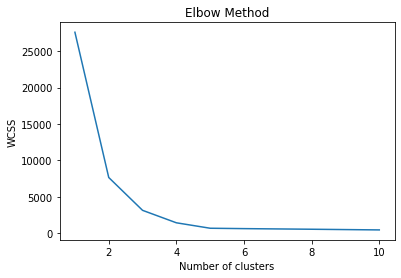

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
